In [1]:
import torch
import numpy as np
import scipy
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle
import copy

In [2]:
torch.set_default_tensor_type(torch.DoubleTensor)

In [3]:
def add_train_random_noise(data, num_adds):
    new_data = np.random.rand(num_adds, data.shape[1])
    return np.concatenate((data, new_data), axis=0)

In [4]:
def rank_normalization(X):
    X = copy.deepcopy(X)
    for z in X:
        ndata = z.shape[0]
        gap = 1./(ndata+1)
        nfeats = z.shape[1]
        for i in range(nfeats):
            z[:, i] = scipy.stats.rankdata(z[:, i], 'ordinal')*gap
    return X

### Boston Housing

In [5]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=142857)
X_train = np.concatenate((X_train, y_train[:, None]), axis=1)
X_test  = np.concatenate((X_test, y_test[:, None]), axis=1)

[X_train, X_test] = rank_normalization([X_train, X_test])
        
X_train = add_train_random_noise(X_train, int(X_train.shape[0]*0.01))

train_data = X_train[:, [0, 13]]
test_data = X_test[:, [0, 13]]

train_data[:, 0] = 1-train_data[:, 0]
test_data[:, 0] = 1-test_data[:, 0]

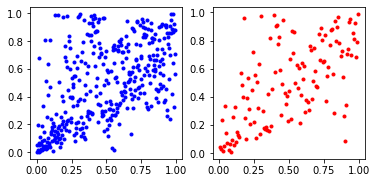

In [6]:
plt.subplot(1,2,1)
plt.plot(train_data[:,0],train_data[:,1],'b.')
plt.axis("square")

plt.subplot(1,2,2)
plt.plot(test_data[:,0],test_data[:,1],'r.')
plt.axis("square")

plt.show()

In [7]:
d = {'samples': torch.tensor(train_data)}
pickle.dump(d, open('./data/realworld/boston_train.p', 'wb'))
d = {'samples': torch.tensor(test_data)}
pickle.dump(d, open('./data/realworld/boston_test.p', 'wb'))

### INTC-MSFT

In [8]:
intel_f = open('data/raw/INTC_MSFT_GE/INTEL.data', 'r')
intel = np.array(list(map(float, intel_f.readlines())))

ms_f = open('data/raw/INTC_MSFT_GE/MS.data', 'r')
ms = np.array(list(map(float, ms_f.readlines())))

ge_f = open('data/raw/INTC_MSFT_GE/GE.data', 'r')
ge = np.array(list(map(float, ge_f.readlines())))

X = np.concatenate((intel[:, None], ms[:, None]), axis=1)
X_train, X_test, _, _ = train_test_split(X, X, shuffle=True, random_state=142857)

[X_train, X_test] = rank_normalization([X_train, X_test])

train_data = X_train[:, [0, 1]]
train_data = add_train_random_noise(train_data, int(train_data.shape[0]*0.01))
test_data = X_test[:, [0, 1]]

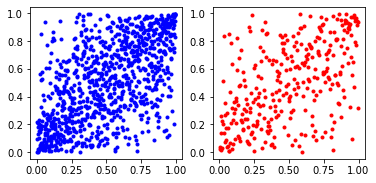

In [9]:
plt.subplot(1,2,1)
plt.plot(train_data[:,0],train_data[:,1],'b.')
plt.axis("square")

plt.subplot(1,2,2)
plt.plot(test_data[:,0],test_data[:,1],'r.')
plt.axis("square")

plt.show()

In [10]:
d = {'samples': torch.tensor(train_data)}
pickle.dump(d, open('./data/realworld/intc_msft_train.p', 'wb'))
d = {'samples': torch.tensor(test_data)}
pickle.dump(d, open('./data/realworld/intc_msft_test.p', 'wb'))

### GOOG-FB

In [11]:
goog_f = open('data/raw/FB_GOOG/goog/close.vals', 'r')
goog = np.array(list(map(float, goog_f.readlines())))

fb_f = open('data/raw/FB_GOOG/fb/close.vals', 'r')
fb = np.array(list(map(float, fb_f.readlines())))

X = np.concatenate((goog[:, None], fb[:, None]), axis=1)
X_train, X_test, _, _ = train_test_split(X, X, shuffle=True, random_state=142857)

nfeats = X_test.shape[1]

[X_train, X_test] = rank_normalization([X_train, X_test])

train_data = X_train[:, [0, 1]]
train_data = add_train_random_noise(train_data, int(train_data.shape[0]*0.01))
test_data = X_test[:, [0, 1]]

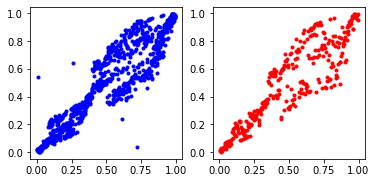

In [12]:
plt.subplot(1,2,1)
plt.plot(train_data[:,0],train_data[:,1],'b.')
plt.axis("square")

plt.subplot(1,2,2)
plt.plot(test_data[:,0],test_data[:,1],'r.')
plt.axis("square")

plt.show()

In [13]:
d = {'samples': torch.tensor(train_data)}
pickle.dump(d, open('./data/realworld/goog_fb_train.p', 'wb'))
d = {'samples': torch.tensor(test_data)}
pickle.dump(d, open('./data/realworld/goog_fb_test.p', 'wb'))